# Exercícios Aula 4

1 - Em um mesmo gráfico, mostre a acurácia em função de k, para o método k-vizinhos, considerando as bases Iris, BreastCancer e Vehicle.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data_iris = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv", header=0)
data_vehicle = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/Vehicle.csv", header=0)

Realizando a classificação para os dados da Iris:

In [11]:
ac_iris = []

#Tranforma os dados pra numpy
data_iris = np.array(data_iris)
nrow, ncol = data_iris.shape
Y_iris = data_iris[:,-1]
X_iris = data_iris[:,0:ncol-1]

#Normaliza os dados
scaler = StandardScaler().fit(X_iris)
X_iris = scaler.transform(X_iris)

#Separa os conjuntos de treinamento e teste
p = 0.3
x_train, x_test, y_train, y_test = train_test_split(X_iris, Y_iris, train_size=p, random_state=10)

# Aplica o Modelo

for k in range(1, 15):
    #ajuste do modelo
    model = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model.fit(x_train,y_train)
    # Predição nos dados de teste
    y_pred = model.predict(x_test)
    #Medida da Acurácia do modelo
    score = accuracy_score(y_test, y_pred)
    ac_iris.append(score)


Realizando a classificação para os dados da BreastCancer:

In [16]:
data_BC = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/BreastCancer.csv", header=0)
print(data_BC.shape)
data_BC = data_BC.dropna()
print(data_BC.shape)

(699, 11)
(683, 11)


In [18]:
ac_BC = []

#Transformando os dados em numpy
data_BC = np.array(data_BC)
nrow, ncol = data_BC.shape
Y_BC = data_BC[:,-1]
X_BC = data_BC[:,1:ncol-1]

#Normalizar
scale = StandardScaler().fit(X_BC)
X_BC = scale.transform(X_BC)

#Separando em conjuntos de treinamento e teste

p = 0.3
x_test, x_train, y_test, y_train = train_test_split(X_BC, Y_BC, train_size=p, random_state=24)

# Construção do modelo

for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    score = accuracy_score(y_test, y_pred)

    ac_BC.append(score)


Realizando a classificação para os dados de Vehicles:

In [19]:
print(data_vehicle.shape)
data_vehicle = data_vehicle.dropna()
print(data_vehicle.shape)

(846, 19)
(846, 19)


In [22]:
ac_vehicles = []

#Transformando os dados em numpy
data_vehicle = np.array(data_vehicle)
nrow, ncol = data_vehicle.shape
Y_vehicle = data_vehicle[:,-1]
X_vehicle = data_vehicle[:,1:ncol-1]

#Normalizar
scale = StandardScaler().fit(X_vehicle)
X_vehicle = scale.transform(X_vehicle)

#Separando em conjuntos de treinamento e teste

p = 0.3
x_test, x_train, y_test, y_train = train_test_split(X_vehicle, Y_vehicle, train_size=p, random_state=24)

# Construção do modelo

for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    score = accuracy_score(y_test, y_pred)

    ac_vehicles.append(score)

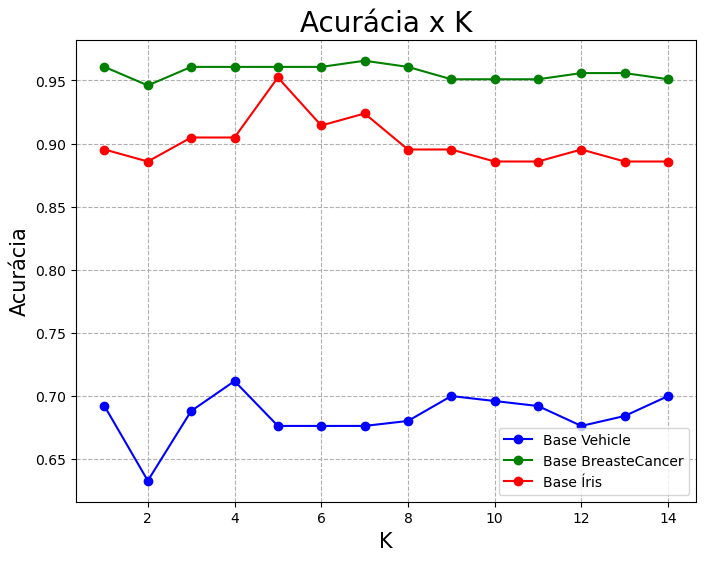

In [42]:
vk = np.arange(1,15,1)

plt.figure(figsize=(8,6))
plt.grid(True, linestyle="--")

plt.plot(vk, ac_vehicles,  "-bo", label="Base Vehicle")
plt.plot(vk, ac_BC, "-go", label="Base BreasteCancer")
plt.plot(vk, ac_iris, "-ro", label="Base Íris")
plt.title("Acurácia x K", fontsize=20)
plt.xlabel("K", fontsize=15)
plt.ylabel("Acurácia", fontsize=15)
plt.legend()
plt.show()